MovieWriter imagemagick unavailable; using Pillow instead.


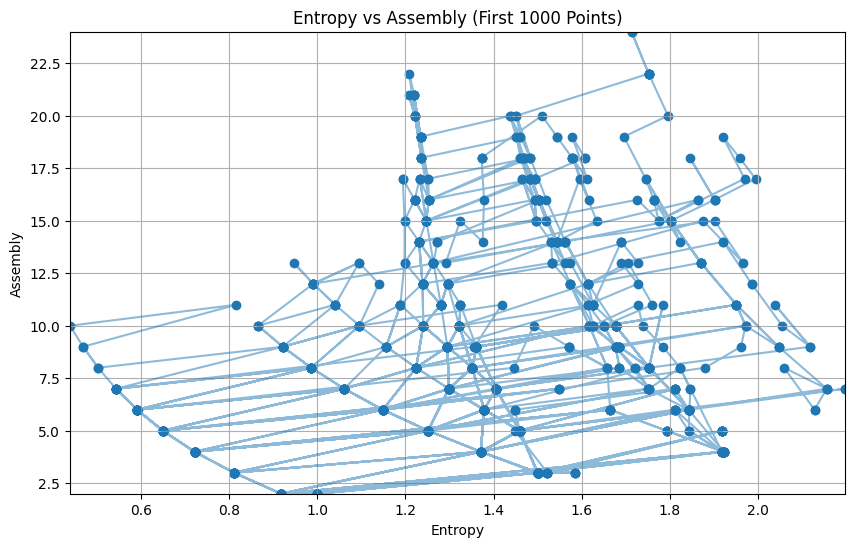

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Load the dataset
file_path = './metrics (10).csv'  # Replace with your file path
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Select the first 1000 points
subset_data = data.head(1000)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Entropy vs Assembly (First 1000 Points)')
ax.set_xlabel('Entropy')
ax.set_ylabel('Assembly')
ax.grid(True)

# Initialize the scatter plot and the line plot
scatter = ax.scatter([], [])
line, = ax.plot([], [], alpha=0.5)

# Set the limits for the axes
ax.set_xlim(subset_data['Entropy'].min(), subset_data['Entropy'].max())
ax.set_ylim(subset_data['Assembly'].min(), subset_data['Assembly'].max())

# Initialize the data for the scatter plot and the line plot
def init():
    scatter.set_offsets([[None, None]])
    line.set_data([], [])
    return scatter, line

# Update function for each frame
def update(frame):
    current_data = subset_data.iloc[:frame+1]
    scatter.set_offsets(current_data[['Entropy', 'Assembly']])
    line.set_data(current_data['Entropy'], current_data['Assembly'])
    return scatter, line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(subset_data), init_func=init, blit=True, repeat=False)

# Save the animation as a GIF
ani.save('entropy_vs_assembly_animation.gif', writer='imagemagick')

plt.show()


In [25]:
%matplotlib inline

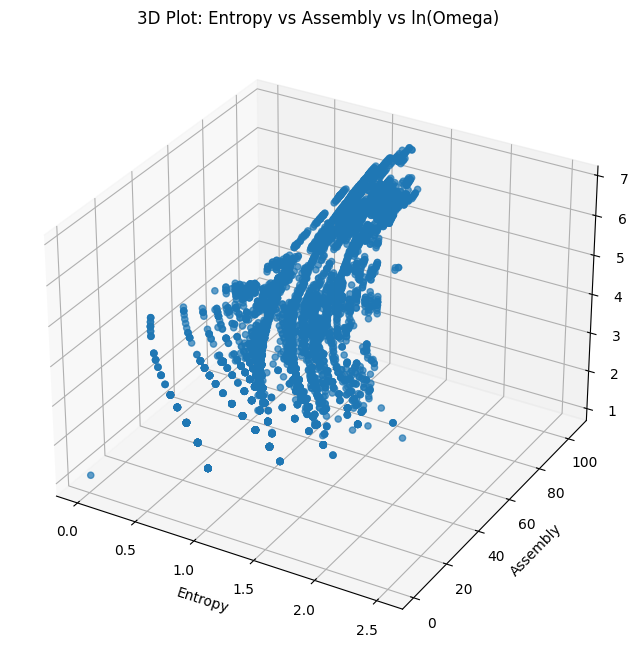

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the new dataset
file_path_15 = 'metrics (15).csv'
data_15 = pd.read_csv(file_path_15)
data_15.columns = data_15.columns.str.strip()

# Add a column for the natural logarithm of Omega
data_15['ln_Omega'] = np.log(data_15['Omega'])

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Entropy, Assembly, and ln(Omega)
sc = ax.scatter(data_15['Entropy'], data_15['Assembly'], data_15['ln_Omega'], alpha=0.7)

# Set titles and labels
ax.set_title('3D Plot: Entropy vs Assembly vs ln(Omega)')
ax.set_xlabel('Entropy')
ax.set_ylabel('Assembly')
ax.set_zlabel('ln(Omega)')

plt.show()

<IPython.core.display.Javascript object>

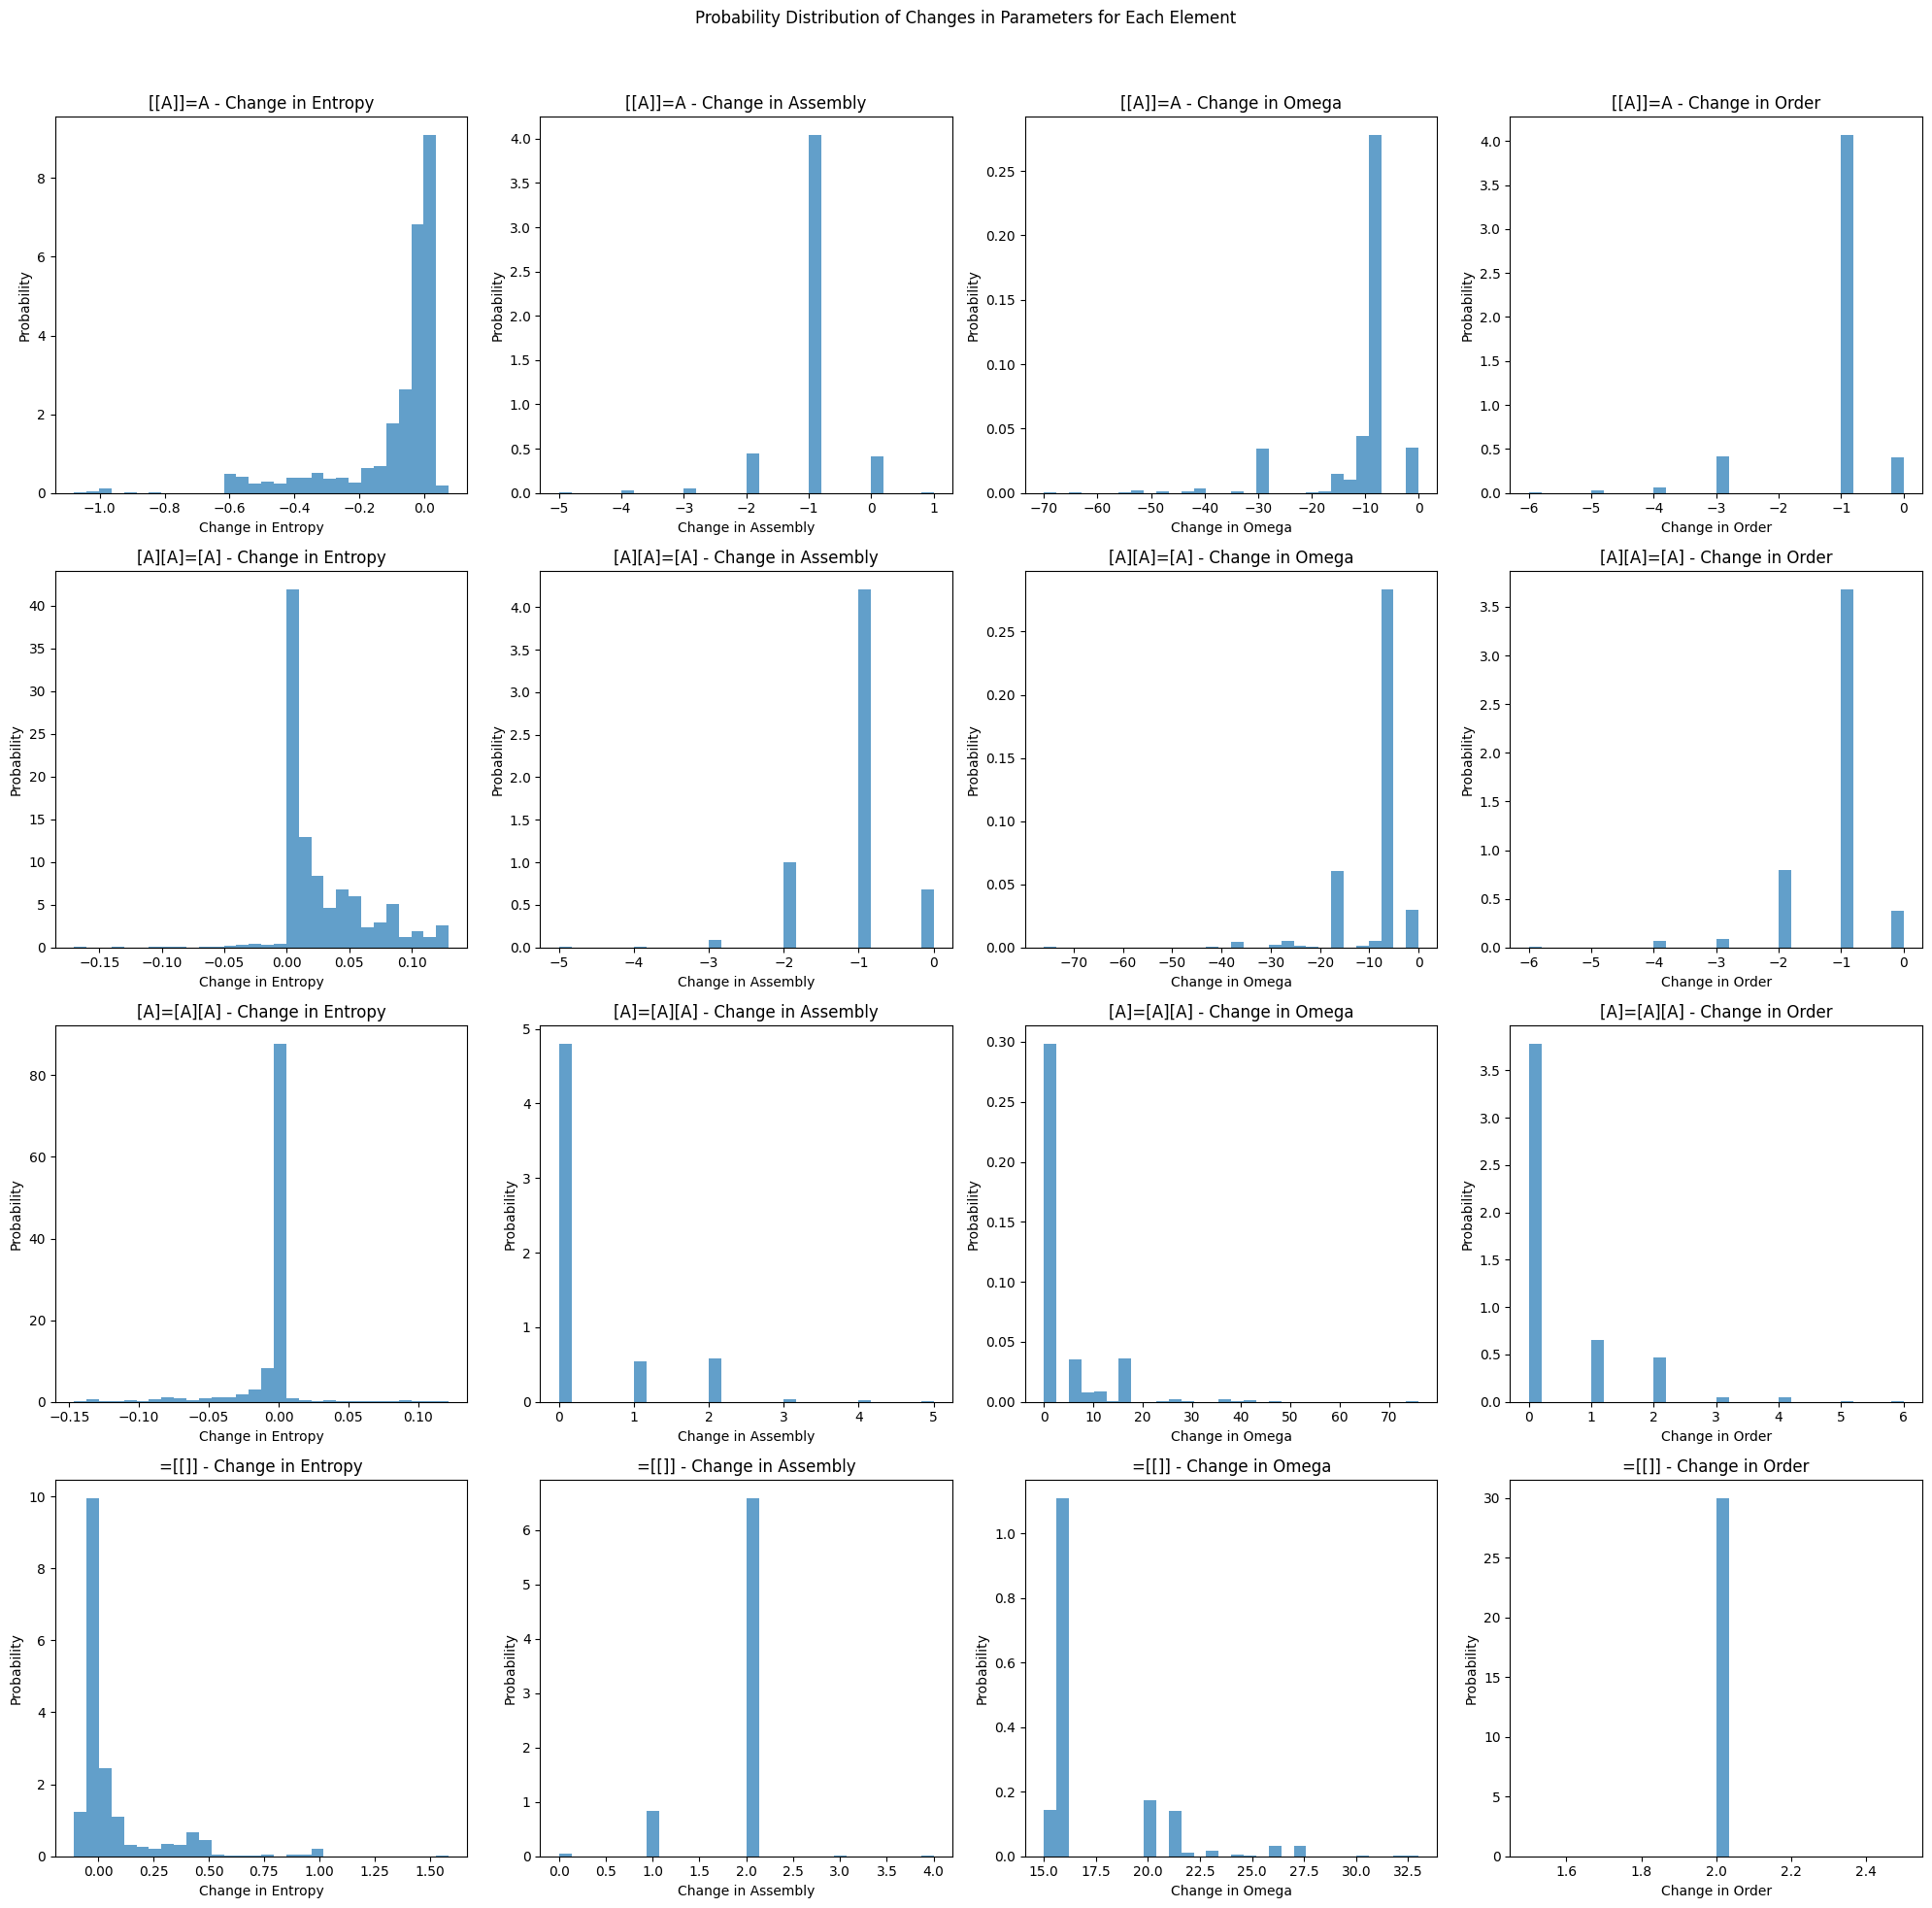

In [30]:
# Load the new dataset with elements
file_path_16 = './metrics (16).csv'
data_16 = pd.read_csv(file_path_16)
data_16.columns = data_16.columns.str.strip()

# Calculate the change in Entropy, Assembly, Omega, and Order for each step
data_16['delta_Entropy'] = data_16['Entropy'].diff().fillna(0)
data_16['delta_Assembly'] = data_16['Assembly'].diff().fillna(0)
data_16['delta_Omega'] = data_16['Omega'].diff().fillna(0)
data_16['delta_Order'] = data_16['Order'].diff().fillna(0)

# Get unique elements
elements = data_16['Element'].unique()

# Plot probability distributions for each element and each parameter
fig, axes = plt.subplots(nrows=len(elements), ncols=4, figsize=(20, 5 * len(elements)))
fig.suptitle('Probability Distribution of Changes in Parameters for Each Element')

for i, element in enumerate(elements):
    element_data = data_16[data_16['Element'] == element]
    
    # Plot for delta_Entropy
    axes[i, 0].hist(element_data['delta_Entropy'], bins=30, density=True, alpha=0.7)
    axes[i, 0].set_title(f'{element} - Change in Entropy')
    axes[i, 0].set_xlabel('Change in Entropy')
    axes[i, 0].set_ylabel('Probability')
    
    # Plot for delta_Assembly
    axes[i, 1].hist(element_data['delta_Assembly'], bins=30, density=True, alpha=0.7)
    axes[i, 1].set_title(f'{element} - Change in Assembly')
    axes[i, 1].set_xlabel('Change in Assembly')
    axes[i, 1].set_ylabel('Probability')
    
    # Plot for delta_Omega
    axes[i, 2].hist(element_data['delta_Omega'], bins=30, density=True, alpha=0.7)
    axes[i, 2].set_title(f'{element} - Change in Omega')
    axes[i, 2].set_xlabel('Change in Omega')
    axes[i, 2].set_ylabel('Probability')
    
    # Plot for delta_Order
    axes[i, 3].hist(element_data['delta_Order'], bins=30, density=True, alpha=0.7)
    axes[i, 3].set_title(f'{element} - Change in Order')
    axes[i, 3].set_xlabel('Change in Order')
    axes[i, 3].set_ylabel('Probability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


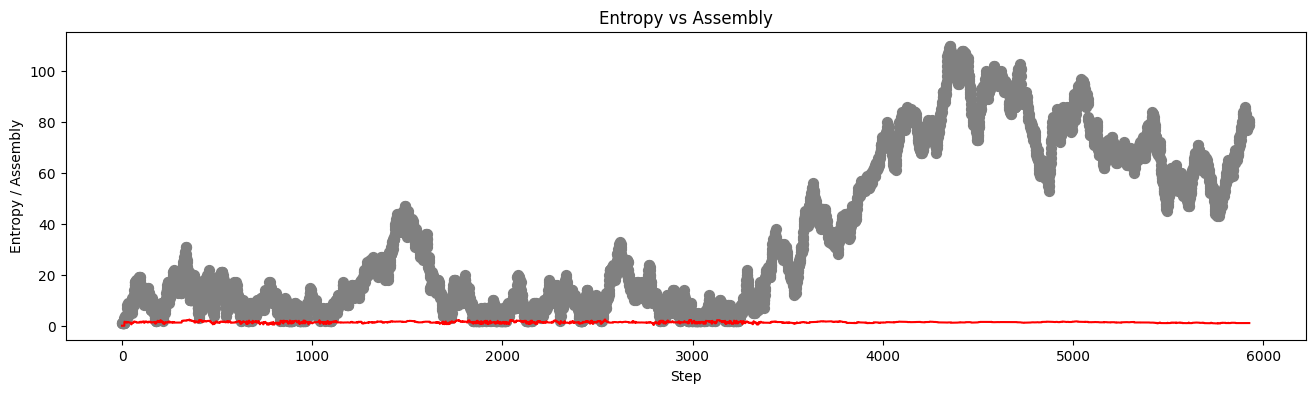

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the new dataset
file_path_16 = 'metrics (16).csv'
data_16 = pd.read_csv(file_path_16)
data_16.columns = data_16.columns.str.strip()

# Create the entropy vs assembly plot
fig, ax = plt.subplots(figsize=(16, 4))

a_input = data_16['Entropy']
b_input = data_16['Assembly']

a = plt.plot(range(len(a_input)), a_input, color='red')[0]
b = plt.scatter(b_input.index, b_input, color='grey', s=50, picker=5)

def add_or_remove_point(event):
    global a
    xydata_a = np.stack(a.get_data(), axis=1)
    xdata_a = a.get_xdata()
    ydata_a = a.get_ydata()
    global b
    xydata_b = b.get_offsets()
    xdata_b = b.get_offsets()[:, 0]
    ydata_b = b.get_offsets()[:, 1]

    # Click x-value
    xdata_click = event.xdata
    # Index of nearest x-value in a
    xdata_nearest_index_a = (np.abs(xdata_a - xdata_click)).argmin()
    # New scatter point x-value
    new_xdata_point_b = xdata_a[xdata_nearest_index_a]
    # New scatter point [x-value, y-value]
    new_xydata_point_b = xydata_a[new_xdata_point_b, :]

    if event.button == 1:
        if new_xdata_point_b not in xdata_b:
            # Insert new scatter point into b
            new_xydata_b = np.insert(xydata_b, 0, new_xydata_point_b, axis=0)
            # Sort b based on x-axis values
            new_xydata_b = new_xydata_b[np.argsort(new_xydata_b[:, 0])]
            # Update b
            b.set_offsets(new_xydata_b)
            plt.draw()
    elif event.button == 3:
        if new_xdata_point_b in xdata_b:
            # Remove xdata point b
            new_xydata_b = np.delete(xydata_b, np.where(xdata_b == new_xdata_point_b), axis=0)
            # Update b
            b.set_offsets(new_xydata_b)
        plt.draw()

fig.canvas.mpl_connect('button_press_event', add_or_remove_point)
plt.title('Entropy vs Assembly')
plt.xlabel('Step')
plt.ylabel('Entropy / Assembly')
plt.show()
